In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    cv2.imshow('OpenCV Feed',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame=cap.read()
    
        image,results = mediapipe_detection(frame,holistic)
        cv2.imshow('OpenCV Feed',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [6]:
results.face_landmarks

landmark {
  x: 0.5427616238594055
  y: 0.6683876514434814
  z: -0.03252430632710457
}
landmark {
  x: 0.5379619598388672
  y: 0.6213833093643188
  z: -0.05095555633306503
}
landmark {
  x: 0.5406390428543091
  y: 0.6385698914527893
  z: -0.029081009328365326
}
landmark {
  x: 0.5283097624778748
  y: 0.5805650949478149
  z: -0.03374568745493889
}
landmark {
  x: 0.5368241667747498
  y: 0.6070542931556702
  z: -0.053058773279190063
}
landmark {
  x: 0.536055326461792
  y: 0.5900894999504089
  z: -0.04781222343444824
}
landmark {
  x: 0.5350441932678223
  y: 0.5521104335784912
  z: -0.018348995596170425
}
landmark {
  x: 0.47173094749450684
  y: 0.565963625907898
  z: 0.02445506490767002
}
landmark {
  x: 0.5338713526725769
  y: 0.5271039605140686
  z: -0.009487181901931763
}
landmark {
  x: 0.532759428024292
  y: 0.5096993446350098
  z: -0.009573623538017273
}
landmark {
  x: 0.5284662842750549
  y: 0.43917563557624817
  z: 0.008588510565459728
}
landmark {
  x: 0.5433279871940613
  y: 

In [7]:
results.face_landmarks.landmark

[x: 0.5427616238594055
y: 0.6683876514434814
z: -0.03252430632710457
, x: 0.5379619598388672
y: 0.6213833093643188
z: -0.05095555633306503
, x: 0.5406390428543091
y: 0.6385698914527893
z: -0.029081009328365326
, x: 0.5283097624778748
y: 0.5805650949478149
z: -0.03374568745493889
, x: 0.5368241667747498
y: 0.6070542931556702
z: -0.053058773279190063
, x: 0.536055326461792
y: 0.5900894999504089
z: -0.04781222343444824
, x: 0.5350441932678223
y: 0.5521104335784912
z: -0.018348995596170425
, x: 0.47173094749450684
y: 0.565963625907898
z: 0.02445506490767002
, x: 0.5338713526725769
y: 0.5271039605140686
z: -0.009487181901931763
, x: 0.532759428024292
y: 0.5096993446350098
z: -0.009573623538017273
, x: 0.5284662842750549
y: 0.43917563557624817
z: 0.008588510565459728
, x: 0.5433279871940613
y: 0.6750451326370239
z: -0.03192799538373947
, x: 0.5439689755439758
y: 0.6802235841751099
z: -0.029192280024290085
, x: 0.5445191860198975
y: 0.6824716925621033
z: -0.02531193383038044
, x: 0.5451432466

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
image.shape

(480, 640, 3)

In [10]:
mp_drawing.draw_landmarks??

In [11]:
mp_holistic??


In [12]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [13]:
frame

array([[[ 73,  87,  83],
        [ 73,  86,  81],
        [ 74,  84,  80],
        ...,
        [ 77,  83,  88],
        [ 79,  87,  90],
        [ 70,  79,  82]],

       [[ 71,  85,  81],
        [ 72,  85,  81],
        [ 75,  85,  82],
        ...,
        [ 77,  84,  89],
        [ 79,  87,  90],
        [ 71,  80,  83]],

       [[ 74,  86,  84],
        [ 76,  87,  85],
        [ 79,  88,  86],
        ...,
        [ 76,  83,  88],
        [ 77,  85,  88],
        [ 72,  80,  83]],

       ...,

       [[111,  61,  89],
        [115,  65,  93],
        [117,  67,  95],
        ...,
        [122,  83,  92],
        [122,  82,  93],
        [120,  80,  91]],

       [[110,  59,  87],
        [115,  64,  92],
        [118,  67,  95],
        ...,
        [121,  80,  91],
        [123,  82,  93],
        [121,  80,  91]],

       [[107,  56,  84],
        [114,  63,  91],
        [117,  66,  94],
        ...,
        [123,  81,  92],
        [125,  83,  94],
        [125,  83,  94]]

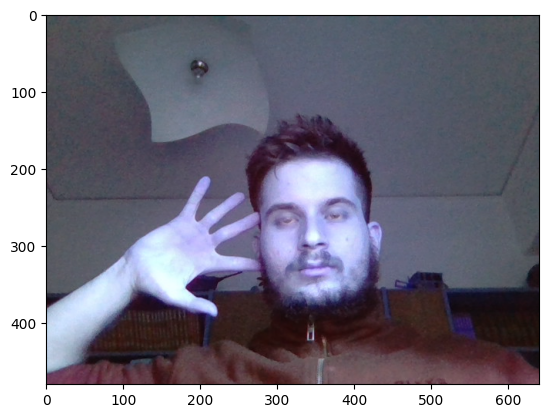

In [14]:
plt.imshow(frame)

In [15]:
results

mediapipe.python.solution_base.SolutionOutputs

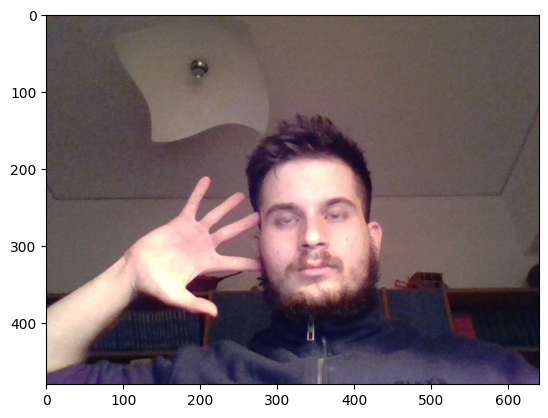

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [17]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame=cap.read()
    
        image,results = mediapipe_detection(frame,holistic)
        draw_landmarks(image,results)
        cv2.imshow('OpenCV Feed',image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

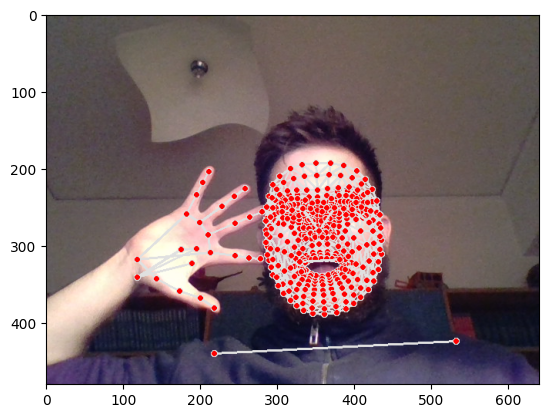

In [18]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [19]:
len(results.right_hand_landmarks.landmark)

21

In [20]:
len(results.pose_landmarks.landmark)

33

In [21]:
results.face_landmarks.landmark[0]

x: 0.5559633374214172
y: 0.6454670429229736
z: -0.03884522616863251

In [22]:
results.right_hand_landmarks.landmark[0]

x: 0.18548142910003662
y: 0.6626832485198975
z: 3.895820270827244e-07

In [23]:
len(results.face_landmarks.landmark)

468

In [24]:
results.pose_landmarks.landmark[0]

x: 0.554402232170105
y: 0.5858451724052429
z: -1.5784136056900024
visibility: 0.9994227290153503

In [25]:
face=[]
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [26]:
test

array([0.62963283, 0.5092963 , 0.01755914])

In [27]:
face

[array([ 0.55596334,  0.64546704, -0.03884523]),
 array([ 0.55083156,  0.59045762, -0.05914217]),
 array([ 0.55358392,  0.61010772, -0.03614987]),
 array([ 0.54242963,  0.54705244, -0.03800797]),
 array([ 0.55010116,  0.57486349, -0.06062564]),
 array([ 0.55004346,  0.55712956, -0.05397901]),
 array([ 0.55072504,  0.51803184, -0.01962749]),
 array([0.48649031, 0.52878505, 0.02752575]),
 array([ 0.55063874,  0.49410641, -0.00778304]),
 array([ 0.55004668,  0.47654817, -0.00615908]),
 array([0.54780596, 0.40342918, 0.01789565]),
 array([ 0.5565511 ,  0.65294385, -0.03873282]),
 array([ 0.55725658,  0.65880972, -0.03667188]),
 array([ 0.55785608,  0.6613155 , -0.03308292]),
 array([ 0.56014043,  0.70849824, -0.02268342]),
 array([ 0.5603134 ,  0.71519828, -0.02506127]),
 array([ 0.56069028,  0.72332114, -0.02779552]),
 array([ 0.56125337,  0.73262084, -0.02580642]),
 array([ 0.56201971,  0.74632668, -0.01748589]),
 array([ 0.55175537,  0.59968585, -0.05496178]),
 array([ 0.54341865,  0.60

In [28]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten()

In [29]:
face

array([ 0.55596334,  0.64546704, -0.03884523, ...,  0.62963283,
        0.5092963 ,  0.01755914])

In [30]:
face.shape

(1404,)

In [31]:
pose = np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten()

In [32]:
pose.shape

(132,)

In [33]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [34]:
def keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [35]:
results_keypoints=keypoints(results)

In [36]:
results_keypoints

array([ 0.55440223,  0.58584517, -1.57841361, ...,  0.33089468,
        0.4255591 , -0.04357183])

In [37]:
np.save('res', results_keypoints)

In [38]:
np.load('res.npy')

array([ 0.55440223,  0.58584517, -1.57841361, ...,  0.33089468,
        0.4255591 , -0.04357183])

In [39]:

DATA_PATH = os.path.join('BOOM') 


actions = np.array(['from_downtown', 'peace', 'rock&roll'])


no_videos = 20


videos_length = 20




In [40]:
for action in actions: 
    for video in range(no_videos):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(video)))
        except:
            pass